In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import matplotlib.pyplot as plt
from tools.demo_model import load_model
from tools.util import * #load_img, resize_img, preprocess_img, postprocess_tens

In [22]:
from tools.model import Model
import torch.nn as nn
from tools.my_demo import display

In [23]:
!cd data/coco/val2017; ls

000000000139.jpg  000000147729.jpg  000000289594.jpg  000000435206.jpg
000000000285.jpg  000000147740.jpg  000000289659.jpg  000000435208.jpg
000000000632.jpg  000000147745.jpg  000000289702.jpg  000000435299.jpg
000000000724.jpg  000000148508.jpg  000000289741.jpg  000000435880.jpg
000000000776.jpg  000000148620.jpg  000000289938.jpg  000000436315.jpg
000000000785.jpg  000000148662.jpg  000000289960.jpg  000000436551.jpg
000000000802.jpg  000000148707.jpg  000000289992.jpg  000000436617.jpg
000000000872.jpg  000000148719.jpg  000000290081.jpg  000000436738.jpg
000000000885.jpg  000000148730.jpg  000000290163.jpg  000000436883.jpg
000000001000.jpg  000000148739.jpg  000000290179.jpg  000000437110.jpg
000000001268.jpg  000000148783.jpg  000000290248.jpg  000000437205.jpg
000000001296.jpg  000000148957.jpg  000000290293.jpg  000000437239.jpg
000000001353.jpg  000000148999.jpg  000000290592.jpg  000000437331.jpg
000000001425.jpg  000000149222.jpg  000000290619.jpg  000000437351.jpg
000000

In [38]:
img_path = 'data/coco/val2017/000000149622.jpg'

# Result from Downloaded Model

In [39]:
model = load_model()

In [40]:
img = load_img(img_path)
(tens_l_orig, tens_l_rs) = preprocess_img(img, HW=(256,256))

# colorizer outputs 256x256 ab map
# resize and concatenate to original L channel
img_bw = postprocess_tens(tens_l_orig, torch.cat((0*tens_l_orig,0*tens_l_orig),dim=1))
out_img = postprocess_tens(tens_l_orig, model(tens_l_rs).cpu())


(-0.5, 639.5, 452.5, -0.5)

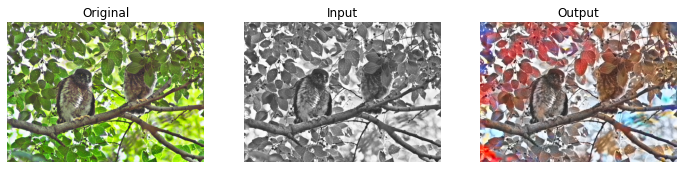

In [41]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_bw)
plt.title('Input')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(out_img)
plt.title('Output')
plt.axis('off')

# Result from Self-trained Model

In [44]:
my_path = 'model.pt'
my_model = Model()
my_model = nn.DataParallel(my_model)
my_model.load_state_dict(torch.load(my_path))

<All keys matched successfully>

In [45]:
rgb_raw, gray_raw, out_rgb = display(my_model, img_path)

/dvmm-filer2/users/zhiyuan/dvmm-filer2/users/zhiyuan/anaconda3/envs/FewShot/lib/python3.9/site-packages/torch/nn/functional.py:3060: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


(-0.5, 639.5, 452.5, -0.5)

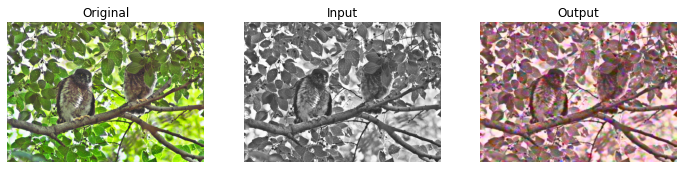

In [46]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(rgb_raw)
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gray_raw, cmap='gray',)
plt.title('Input')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(out_rgb)
plt.title('Output')
plt.axis('off')

(-0.5, 639.5, 452.5, -0.5)

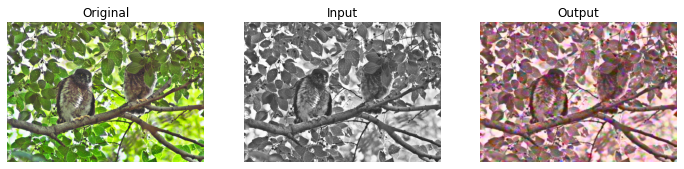

In [43]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(rgb_raw)
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gray_raw, cmap='gray',)
plt.title('Input')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(out_rgb)
plt.title('Output')
plt.axis('off')